In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pydicom

from PIL import Image

In [22]:
pre_path = 'data/manifest-1722210581008/ISPY2/ISPY2-100899/10-26-2002-100899T0-ISPY2MRIT0-88595/500.000000-ISPY2 AX VIBRANT-SERIES-52523/1-042.dcm'
post_path = 'data/manifest-1722210581008/ISPY2/ISPY2-100899/10-26-2002-100899T0-ISPY2MRIT0-88595/501.000000-ISPY2 Ph1AX VIBRANT-SERIES-03969/1-042.dcm'


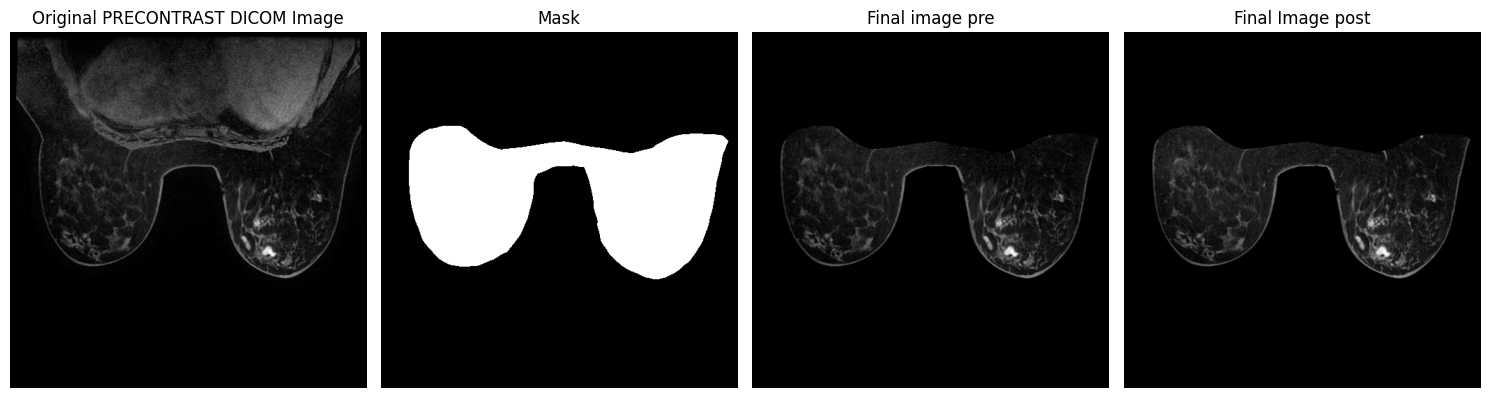

In [60]:


#data preparation
dicom_path = pre_path
dicom_image = pydicom.dcmread(dicom_path)
predicom_array = dicom_image.pixel_array

dicom_path2 = post_path
dicom_image2 = pydicom.dcmread(dicom_path2)
postdicom_array = dicom_image2.pixel_array


mask_path = 'mask/precontrast_mask.png'
mask_image = Image.open(mask_path).convert('L')  # Ensure grayscale
mask_array = np.array(mask_image)


#0 or 1
mask_array = (mask_array > 0).astype(np.uint8)


#The multiplication
masked_array = predicom_array * mask_array
masked_array2 = postdicom_array * mask_array




#Plotting our results below
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

axes[0].imshow(predicom_array, cmap='gray')
axes[0].set_title('Original PRECONTRAST DICOM Image')
axes[0].axis('off')

axes[1].imshow(mask_array, cmap='gray')
axes[1].set_title('Mask')
axes[1].axis('off')

axes[2].imshow(masked_array, cmap='gray')
axes[2].set_title('Final image pre')
axes[2].axis('off')

axes[3].imshow(masked_array2, cmap='gray')
axes[3].set_title('Final Image post')
axes[3].axis('off')



plt.tight_layout()
plt.show()


Now plotting a histogram of the signal intensities for masked_array and masked_array2

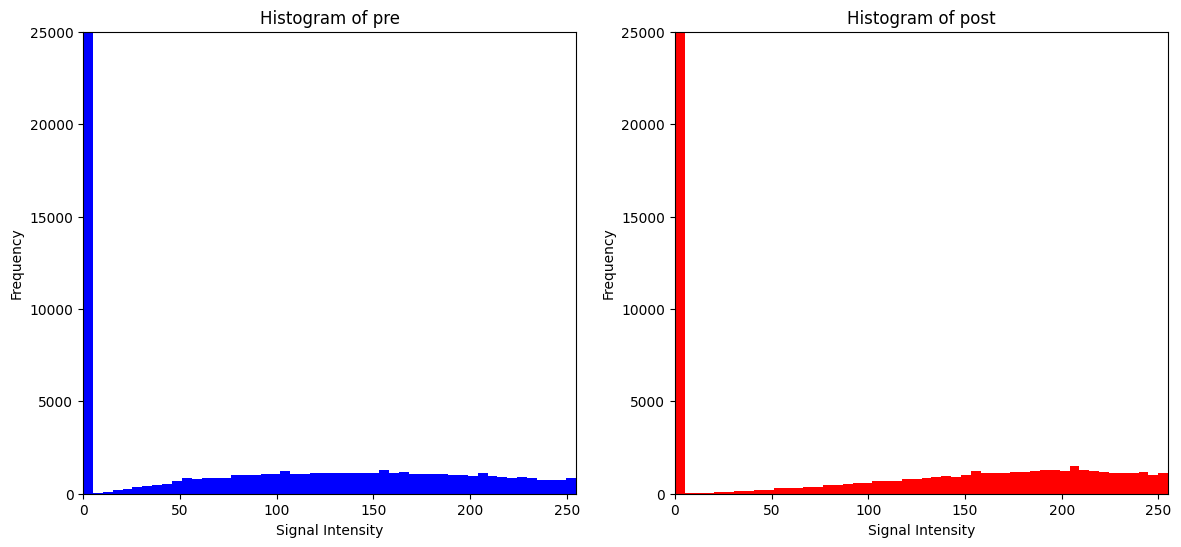

In [62]:


masked_array_flat = masked_array.flatten()
masked_array2_flat = masked_array2.flatten()


plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(masked_array_flat, bins=50, color='blue',  range=(0, 255))
plt.title('Histogram of pre')
plt.xlabel('Signal Intensity')
plt.ylabel('Frequency')
plt.xlim(0, 255)
plt.ylim(0, 25000)


plt.subplot(1, 2, 2)
plt.hist(masked_array2_flat, bins=50, color='red',  range=(0, 255))
plt.title('Histogram of post')
plt.xlabel('Signal Intensity')
plt.ylabel('Frequency')
plt.xlim(0, 255)
plt.ylim(0, 25000)

plt.show()


